# Ensembles
---------------------------------

This example shows how to use atom's ensemble techniques to improve predictions on a dataset combining several models.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [15]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [16]:
# Load the data
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

## Run the pipeline

In [17]:
# Initialize atom and train several models
atom = ATOMClassifier(X, y, verbose=2, warnings=False, random_state=1)
atom.run(models=["LR", "Tree", "LGB"], metric="accuracy")

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (569, 31)
Scaled: False
Outlier values: 174 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|    |     dataset |       train |        test |
| -- | ----------- | ----------- | ----------- |
| 0  |   212 (1.0) |   167 (1.0) |    45 (1.0) |
| 1  |   357 (1.7) |   289 (1.7) |    68 (1.5) |


Training ========================= >>
Models: LR, Tree, LGB
Metric: accuracy


Results for Logistic Regression:
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.9912
Test evaluation --> accuracy: 0.9646
Time elapsed: 0.047s
-------------------------------------------------
Total time: 0.047s


Results for Decision Tree:
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9469
Time elapsed: 0.016s
---

## Voting

In [18]:
# Combine the models into a Voting model
atom.voting(voting="soft")



Results for Voting:
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9735
Time elapsed: 0.031s


In [19]:
# Note that we now have an extra model in the pipeline
atom.models

['LR', 'Tree', 'LGB', 'Vote']

In [20]:
# The Vote model averages the scores of the models it contains
atom.vote

Voting
 --> Estimator: VotingClassifier
 --> Evaluation: accuracy: 0.9735

In [21]:
# We can use it like any other model to make predictions or plots
atom.vote.predict_proba_test[:10]

array([[4.19991299e-01, 5.80008701e-01],
       [6.48864108e-05, 9.99935114e-01],
       [4.27978923e-05, 9.99957202e-01],
       [9.99989219e-01, 1.07807315e-05],
       [3.05053115e-03, 9.96949469e-01],
       [9.98028247e-01, 1.97175259e-03],
       [3.49327649e-03, 9.96506724e-01],
       [2.49145998e-04, 9.99750854e-01],
       [2.43109249e-05, 9.99975689e-01],
       [3.27725335e-04, 9.99672275e-01]])

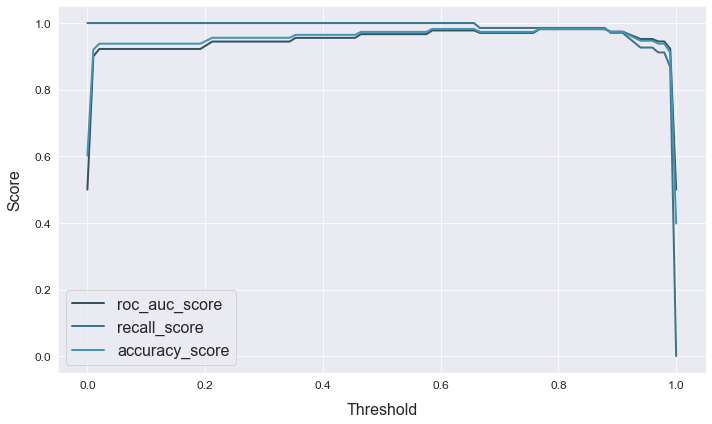

In [22]:
atom.vote.plot_threshold(metric=["auc", "recall", "accuracy"])

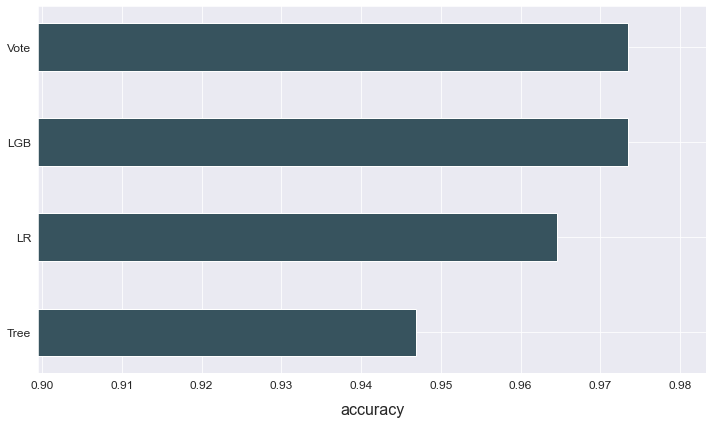

In [23]:
atom.plot_results()

In [24]:
atom.vote.delete()

Model Vote successfully deleted.


## Stacking

In [25]:
# Just like Voting, we can create a Stacking model
atom.stacking(final_estimator="LDA")



Results for Stacking:
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.9934
Test evaluation --> accuracy: 0.9823
Time elapsed: 0.641s


In [26]:
# The final estimator uses the predictions of the underlying models
atom.stack.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,18.34,114.10,809.2,0.1312,0.36350,0.3219,0.11080,0.2827,0.09208,1
1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.41660,0.5006,0.20880,0.3900,0.11790,0
2,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,19.93,88.81,585.4,0.1483,0.20680,0.2241,0.10560,0.3380,0.09584,1
3,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.1234,0.24450,0.3538,0.15710,0.3206,0.06938,0
4,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165,0


In [27]:
# Again, the model can be used for predictions or plots
atom.stack.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

Permutation explainer: 114it [01:04,  1.53it/s]                         


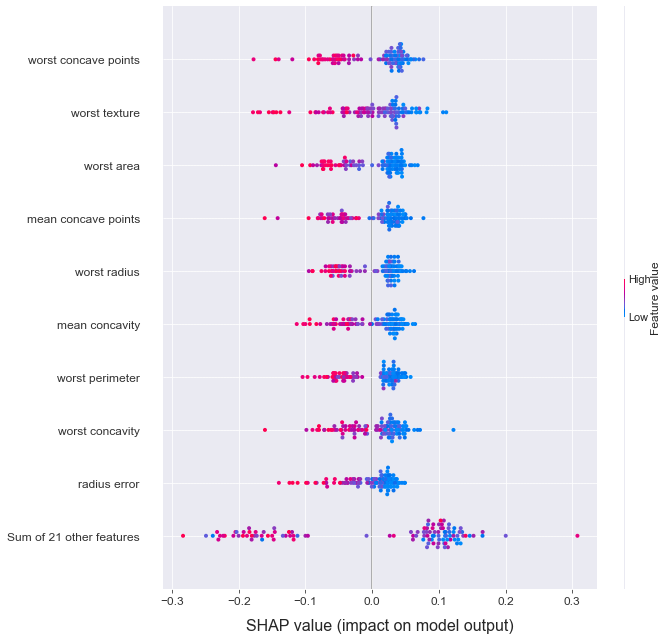

In [28]:
atom.stack.beeswarm_plot(show=10)